# 1. 라이브러리 가져오기

In [2]:
!pip install missingno

In [4]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.7/158.7 kB 7.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

/var/folders/gx/q7vn3yv17rvb0vy6chbbbztw0000gn/T/ipykernel_4807/1388874245.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


# 2. 데이터 세트 로드

In [2]:
df=pd.read_csv("Data/heart.csv")
df1=pd.read_csv("Data/o2Saturation.csv")
df.head()
df1.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


## heart 데이터 설명

- age : 해당 사람의 나이

- sex : 성별

- cp : 흉통형

- trtbps : 정지 혈압 (mm Hg)

- chol : BMI 센서를 통해 유입된 콜레스테롤(mg/dl)

- fbs : (평균 혈당 > 120mg/dl) (1 = true, 0 = false)

- restecg : 정지 심전도 결과

- thalachh : 달성된 최대 심박수

- exng : 운동으로 인한 협심증(1 = 예, 0 = 아니오)

- oldpeak : 이전 피크

- slp : 경사

- caa : 주요 혈관 수(0-3)

- thall : 키가분 비중 

- output : 대상 변수

## o2Saturation 데이터 설명
- 포화도 칼럼

# 3. 데이터 세트에 대한 탐색적 정보

In [3]:
# o2Saturation 데이터 칼럼명 지정
df1.rename(columns = {"98.6":"Saturasyon"}, inplace=True)

In [4]:
df1.shape, df.shape

((3585, 1), (303, 14))

In [5]:
# 데이터 합치기
data = pd.concat([df, df1], axis=1)
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


In [6]:
# 각 칼럼별 null값이 몇개나 존재하는지 확인
data.isnull().sum()

age           3282
sex           3282
cp            3282
trtbps        3282
chol          3282
fbs           3282
restecg       3282
thalachh      3282
exng          3282
oldpeak       3282
slp           3282
caa           3282
thall         3282
output        3282
Saturasyon       0
dtype: int64

- 이를 확인하면, 우선 행의 개수가 안맞는다는 점에서 오류가 발생한다. 조금 더 살펴보자

In [7]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,3585.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,98.239275
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.726336
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.600000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,98.600000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,98.600000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,99.600000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    float64
 2   cp          303 non-null    float64
 3   trtbps      303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    float64
 6   restecg     303 non-null    float64
 7   thalachh    303 non-null    float64
 8   exng        303 non-null    float64
 9   oldpeak     303 non-null    float64
 10  slp         303 non-null    float64
 11  caa         303 non-null    float64
 12  thall       303 non-null    float64
 13  output      303 non-null    float64
 14  Saturasyon  3585 non-null   float64
dtypes: float64(15)
memory usage: 448.1 KB


In [9]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', 'Saturasyon'],
      dtype='object')

In [10]:
data.shape

(3585, 15)

- 일단 합치긴 합쳤는데, 데이터가 상당히 엉망이다. 따라가 보자.

# 4. EDA

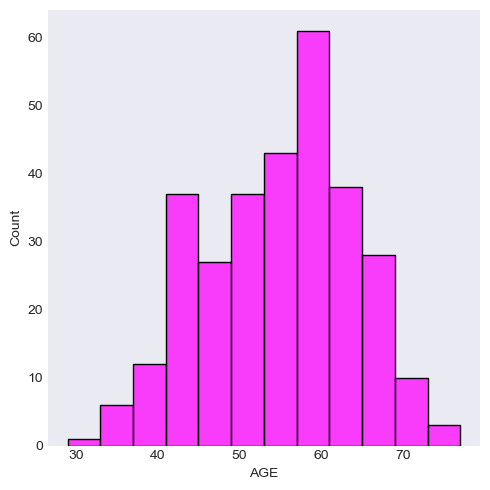

In [11]:
# 나이 분포 그래프 그리기
sns.displot(data = data, x = 'age', color='magenta')
plt.xlabel("AGE")
plt.show()

- 결과 : 50대 이상의 비중이 좀 높고, 56~60세의 나이 분포가 가장 많다

- displot (분포도 표현) : 각 부분에 해당하는 분포가 어느정도인지 표현

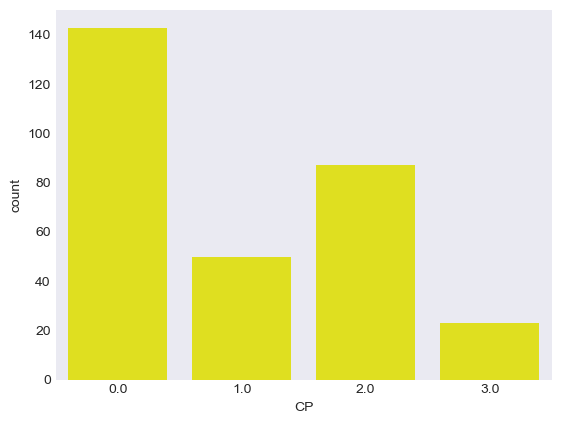

In [12]:
# cp(흉통형 데이터) 확인
sns.countplot(data = data, x='cp', color='yellow')
plt.xlabel('CP')
plt.show()

- value 1: 전형적인 협심증 (0)
- value 2: 비정형 협심증 (1)
- value 3: 비혈관통증  (2)
- value 4: 무증상 (3)

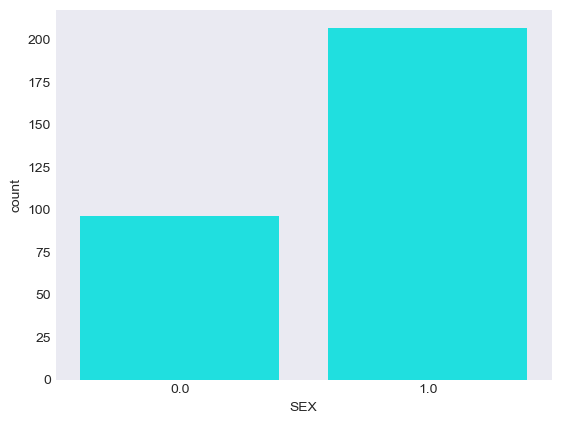

In [13]:
# 성별 분포
sns.countplot(data=data, x='sex', color='cyan')
plt.xlabel('SEX')
plt.show()

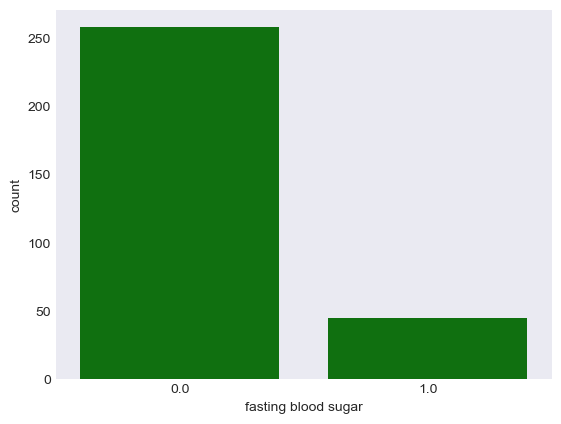

In [14]:
# fbs(평균 혈당) 그래프 (120 초과시 1(true), 아니면 0(false))
sns.countplot(data=data, x='fbs',color='green')
plt.xlabel('fasting blood sugar')
plt.show()

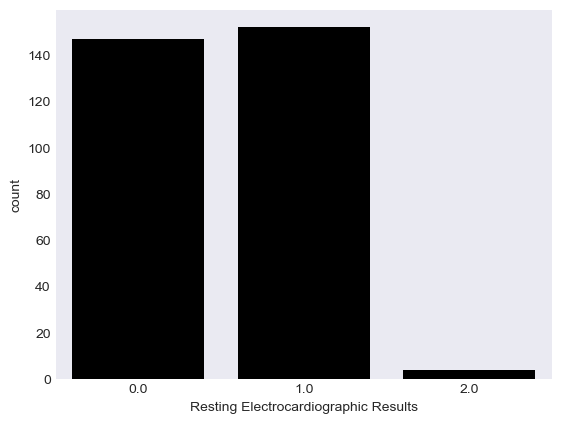

In [15]:
# rest_messages : 휴면 심전도 결과
sns.countplot(data=data, x='restecg', color='black')
plt.xlabel("Resting Electrocardiographic Results")
plt.show()

- 값 0: 정상
- 값 1: ST-T파 이상(T파 반전 및/또는 ST 상승 또는 0.05 mV 이상의 하강)이 있음
- 값 2: 에스테스의 기준에 따라 가능성이 있거나 확실한 좌심실 비대를 보여준다

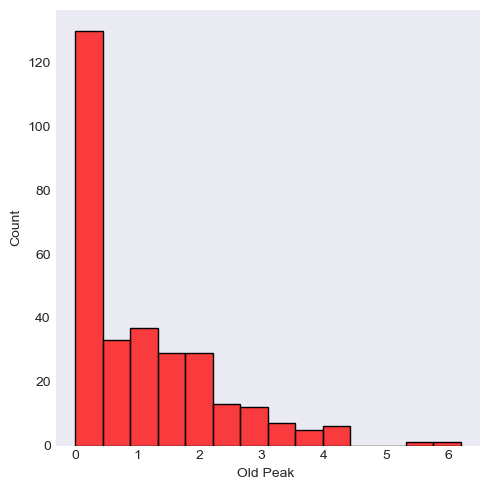

In [16]:
# oldpeak : 이전 피크
sns.displot(data=data, x='oldpeak',color='red')
plt.xlabel('Old Peak ')
plt.show()

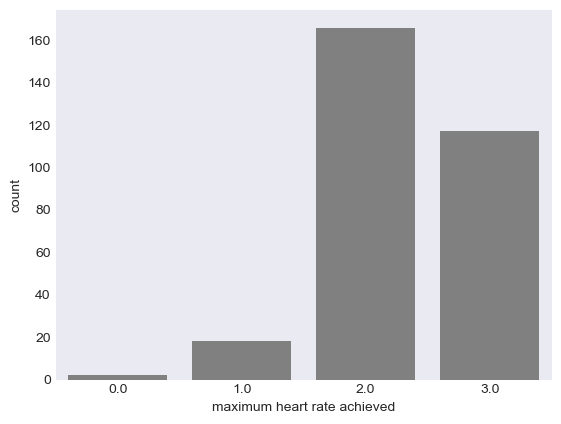

In [17]:
# thall : 키 가분 비중
sns.countplot(data=data, x="thall", color="gray")
plt.xlabel("maximum heart rate achieved")
plt.show()

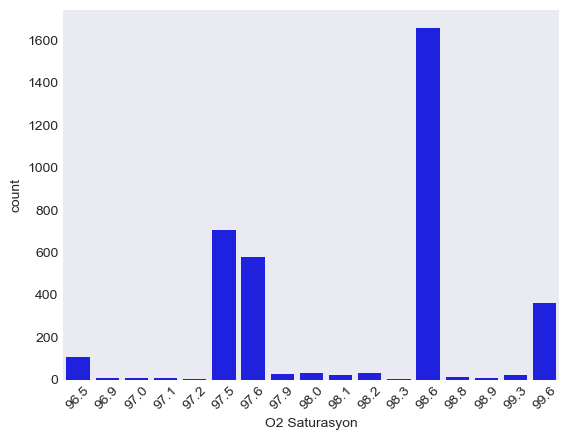

In [18]:
# Saturasyon : 포화수준
sns.countplot(data=data, x="Saturasyon", color="blue")
plt.xticks(rotation=45)
plt.xlabel("O2 Saturasyon")
plt.show()

In [19]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5


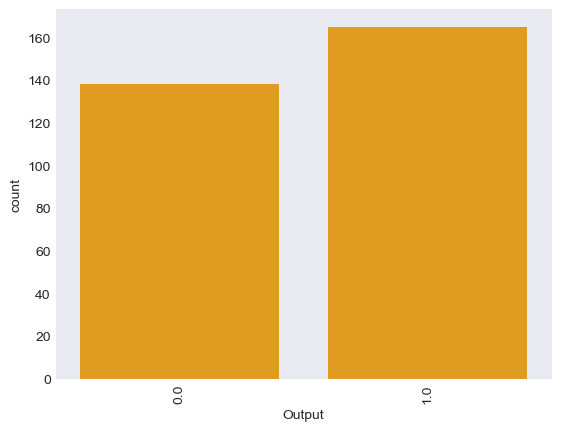

In [20]:
# 타켓 데이터 분포
sns.countplot(data=data, x="output", color="orange")
plt.xticks(rotation=90)
plt.xlabel("Output")
plt.show()

- 데이터가 일단 어느정도는 균등한 것을 확인할 수 있다.

# 5. 예측

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [24]:
data_len = len(data)
data_len

3585

In [26]:
test = data[:data_len]
test

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,Saturasyon
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0,98.6
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0,98.6
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0,98.6
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0,98.1
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0,97.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6
3583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.6


In [27]:
len(df), len(df1), len(data)

(303, 3585, 3585)

In [28]:
data = data[np.isfinite(data).all(1)]

In [35]:
len(data)

303

- isfinite : 자료형이 숫자형이여야 하고, 유한인지 무한인지 확인
- all : 여러 개의 데이터가 모두 어떤 조건을 만족하는지 확인. 
    - 여기서는 모두 1이여야 수락

In [29]:
X_train = data.drop(labels = 'output', axis = 1)
y_train = data['output']
y_train

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
298    0.0
299    0.0
300    0.0
301    0.0
302    0.0
Name: output, Length: 303, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [34]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 203
X_test 100
y_train 203
y_test 100
test 3585


In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/leeshinhaeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
acc_log_train = round(logreg.score(X_train, y_train)*100, 2)
acc_log_test = round(logreg.score(X_test, y_test)*100, 2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 88.67
Testing Accuracy: % 81.0


- score함수로 주어진 테스트 데이터 및 레이블에 대한 평균 정확도를 파악할 수 있음.

In [38]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.8866995073891626, 0.81)

In [39]:
# 내가 별개로 돌린 코드
pred = logreg.predict(X_test)
print(accuracy_score(y_test, pred))

0.81


- accuracy_score를 돌렸는데 score(X_test, y_test)와 결과가 같다

In [40]:
# ML모델들을 여러개 한꺼번에 돌리기 위해 리스트로 담음
# 돌릴 모델 : 결정트리, SVC, 랜덤포레스트, 로지스틱 회귀, KNN
random_state=42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state, solver='lbfgs', max_iter = 1000),
             KNeighborsClassifier()]

In [42]:
# 결정트리 파라미터
dt_param_grid = {
    'min_samples_split' : range(10, 500, 20),
    'max_depth':range(1,20,2)
}
# 서포트 벡터머신 파라미터
svc_param_grid = {'kernel':['rbf'], # 비선형 분리(가우시안)
                 'gamma':[0.001, 0.01, 0.1, 1],
                 'C':[1,10,50,100,200,300,1000]}
# 랜덤포레스트 파라미터
rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}
# 로지스틱 회귀 파라미터
logreg_param_grid = {"C":np.logspace(1,3,5),
                    "penalty": ["l1","l2"]}
# KNN 파라미터
knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

- 서포트 벡터 머신 파라미터 (스케일링에 민감함)
    - C : 오류를 얼마나 허용할 것인지 규제함. 클 수록 하드마진, 작을수록 소프트마진에 가까움
    - gamma : 'scale' -> 결정경계를 얼마나 유연하게 그릴지, 클수록 오버피팅의 가능성이 높아짐

- 로지스틱 회귀 파라미터
    - C : 규제 강도 (서포트 벡터 머신이랑 같음)
    - pelalty : 규제에 사용된 기준 지정 (lasso, lidge, elasticnet, none) 기본 : l2

In [43]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid = classifier_param[i],
                      cv = StratifiedKFold(n_splits=10), scoring='accuracy',
                      n_jobs = -1, verbose=1)
    clf.fit(X_train, y_train) 
    cv_result.append(clf.best_score_) # 최고의 정확도
    best_estimators.append(clf.best_estimator_) # 최고의 결과를 내는 파라미터
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.7785714285714286
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.659047619047619
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8666666666666666
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/leeshinhaeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/leeshinhaeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/leeshinhaeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/leeshinhaeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/line

0.8516666666666668
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.6738095238095239


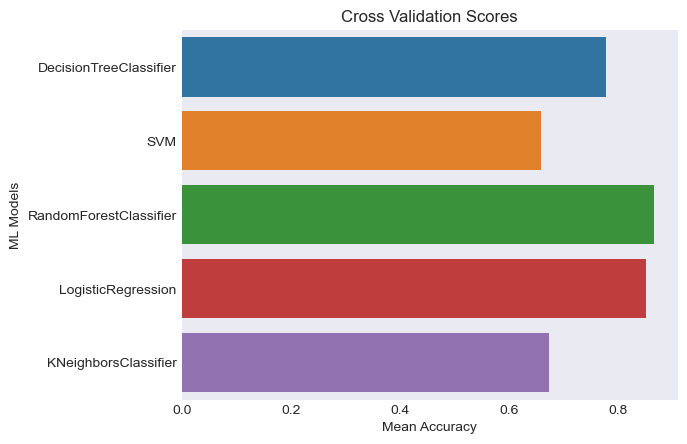

In [55]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot(data = cv_results,x="Cross Validation Means", y="ML Models")
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")
plt.show()

In [47]:
cv_results

,Cross Validation Means,ML Models
0,0.778571,DecisionTreeClassifier
1,0.659048,SVM
2,0.866667,RandomForestClassifier
3,0.851667,LogisticRegression
4,0.673810,KNeighborsClassifier
